In [1]:
import sys
import scipy
import numpy             as     np
import pylab             as     pl
import matplotlib.pyplot as     plt

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [ ]:
from   distances         import comoving_distance, dist_mod
from   ajs_kcorr         import ajs_kcorr
from   params            import params
from   tmr_kcorr         import tmr_kcorr
from   ref_gmr           import one_reference_gmr
from   abs_mag           import abs_mag, app_mag
from   tmr_ecorr         import tmr_ecorr
from   astropy.table     import Table, join, unique
from   SV3.define_sample import define_sample

Text(0.5, 0.98, '$r=19.0$ with $(g-r)=0.95$')

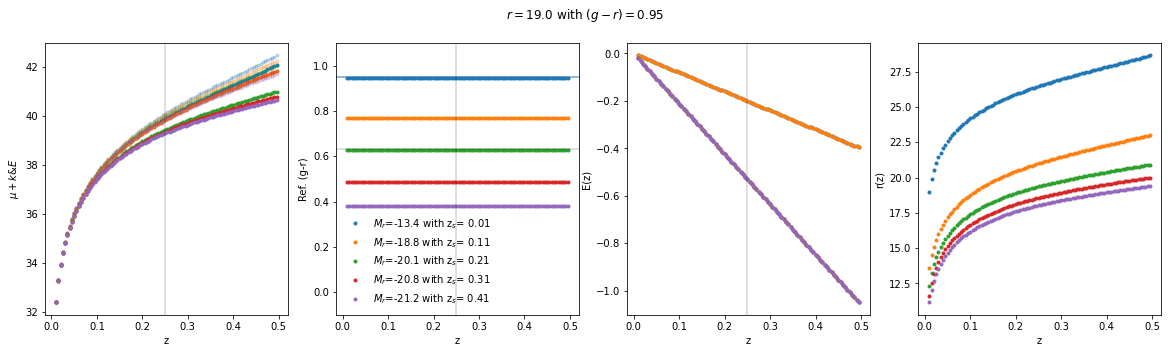

In [4]:
x           = ajs_kcorr()  # [ajs_kcorr, tmr_kcorr]                                                                                                                                                                                          

rp          =  19.0
band        =    'r'
obs_gmr     =  0.95

fig, axes   = plt.subplots(1, 4, figsize=(20, 5))

prop_cycle  = plt.rcParams['axes.prop_cycle']
colors      = prop_cycle.by_key()['color']

# source redshift. 
for i, zs in enumerate(np.arange(0.01, 0.5, 0.1)):
    chi     = comoving_distance(zs)
    mu      = dist_mod(chi)

    # Absolute r-band magnitude for given obs. r, color and source z. 
    MM      = abs_mag(x, rp, obs_gmr, zs,  band='r').item()
    
    # Reference (g-r).
    ref_gmr = one_reference_gmr(x, obs_gmr, zs, zref=params['ref_z'])

    for j, zz in enumerate(np.arange(0.01, 0.5, 0.005)):
        if j == 0:
            label = r'$M_r$' + '={:.1f}'.format(MM) + ' with z$_s$' + '= {:.2f}'.format(zs)
        else:
            label = ''
            
        mu      = dist_mod(zz)
            
        kk      = x.eval(ref_gmr, zz, band=band, ref_z=params['ref_z'], ecorr=False)
        kkE     = x.eval(ref_gmr, zz, band=band, ref_z=params['ref_z'], ecorr=True)

        mm      = app_mag(x, MM, obs_gmr, zz, band='r', ref_z=params['ref_z'], ref_gmr=ref_gmr, distance_only=False)
        
        axes[0].plot(zz, mu + kk,  marker='.', lw=0.0, c=colors[i], alpha=0.25)
        axes[0].plot(zz, mu + kkE, marker='.', lw=0.0, c=colors[i])                                                                                                                                                                                              
        
        axes[1].plot(zz, ref_gmr,  marker='.', lw=0.0, c=colors[i], label=label)
    
        tt      = 'blue' if (ref_gmr <= params['rf_gmr_redblue']) else 'red'
        E       = tmr_ecorr(zz, tt=tt, zref=params['ref_z'], band='r')
    
        axes[2].plot(zz, E, marker='.', lw=0.0, c=colors[i])

        axes[3].plot(zz, mm, marker='.', lw=0.0, c=colors[i])
        
    axes[1].axhline(obs_gmr, lw=0.25)
    
axes[0].axvline(0.25, lw=0.25, c='k')
axes[0].set_xlabel('z')
axes[0].set_ylabel('$\mu + k&E$')

axes[1].axhline(params['rf_gmr_redblue'], lw=0.25, c='k')
axes[1].axvline(0.25, lw=0.25, c='k')
axes[1].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('z')
axes[1].set_ylabel('Ref. (g-r)')
axes[1].legend(frameon=False, loc=3)

axes[2].axvline(0.25, lw=0.25, c='k')
axes[2].set_xlabel('z')
axes[2].set_ylabel('E(z)')

axes[3].set_xlabel('z')
axes[3].set_ylabel('r(z)')

fig.suptitle('$r=19.0$ with $(g-r)={:.2f}$'.format(obs_gmr))

In [5]:
version = 0.4

In [6]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,BRICK_OBJID,BRICKID,CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,WMIN,WMAX,NQ,PROB,FILENAME,URL,URL_IMG,ZGAMA,RELEASE,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,int32,int32,int32,bytes23,int16,int16,int16,float32,bytes33,bytes9,int16,float32,float64,int16,float32,bytes67,bytes88,bytes92,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,1482,318256,999999,N/A,16959,16959,16959,1e+20,N/A,N/A,16959,1e+20,1e+20,16959,1e+20,N/A,N/A,N/A,1e+20,16959,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,S,,2720,318256,999999,N/A,16959,16959,16959,1e+20,N/A,N/A,16959,1e+20,1e+20,16959,1e+20,N/A,N/A,N/A,1e+20,16959,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,Tr

In [7]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39627733927462346,-1.0,1.0,1.0,1.0120848417282104,1.0504201650619507,6557842.901928521,-19.916587874245813,0.7856902434795595,0.7195012659190705,0.2143594626878119,1.3841174716729834e-07,0.9076824937045924
39627733927463584,-1.0,1.0,1.0,1.0099681615829468,1.0504201650619507,4388413.1469421005,-20.738766389614653,0.8390089675629283,0.7640864042155214,0.2941644387905505,4.662134019296747e-08,0.20459370223087864
39627733927463809,-1.0,1.0,1.0,1.0021929740905762,1.0504201650619507,4455176.687953372,-21.078121125651027,0.8988151303317244,0.8130684548647261,0.330231769511073,3.1087072420182375e-08,0.1384984003431147
39627733927464616,-1.0,1.0,1.0,1.0001806020736694,1.0504201650619507,84719.66841474558,-19.689694313761,1.0325692740796637,0.8785213630569358,0.19263752841677584,1.9854703816758006e-07,0.016820839238287217
39627733927464793,-1.0,1.0,1.0,1.0094077587127686,1.0504201650619507,15168192.405866759,-20.78261008302364,0.899293817950499,0.8218316345956519,0.29588250478293676,4.5684154110034526e-08,0.6929460394402723
39627733927464814,-1.0,1.0,0.0,1.051695466041565,1.0504201650619507,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
39627733927465411,-1.0,1.0,1.0,1.0092251300811768,1.0504201650619507,13263605.968152622,-20.75817917589253,0.9334649528314611,0.8484168999264025,0.2919526463434159,4.786385749236657e-08,0.6348473458945598
39627733927465840,-1.0,1.0,1.0,1.0278266668319702,1.0504201650619507,26279255.262881078,-20.98049291878994,0.7231080168748883,0.6748943137875617,0.3295045747933823,3.132935876129051e-08,0.8233122161103331
39627733931658393,-1.0,1.0,1.0,1.002821922302246,1.0504201650619507,1326557.0487486974,-20.228460950007847,0.5482849485932211,0.5161276491652784,0.2998197426243902,4.362442635531498e-08,0.05787029027926153


In [8]:
isin                   = define_sample(bright_merge_obs)

bright_merge_obs       = bright_merge_obs[isin]
derived                = derived[isin]

In [9]:
np.mean(isin)

0.9628009885232963

In [10]:
joined = join(derived, unique(bright_merge_obs['TARGETID', 'RMAG_DRED', 'Z'], keys='TARGETID', keep='first'), join_type='left', keys='TARGETID')

(-0.1, 0.8)

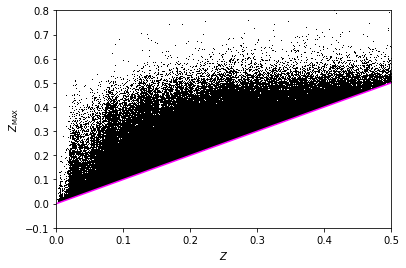

In [11]:
xs = np.arange(-0.1, 0.6, 0.01)

pl.plot(joined['Z'], joined['ZMAX'], marker=',', lw=0.0, c='k')
pl.plot(xs, xs, c='magenta')

pl.xlabel(r'$Z$')
pl.ylabel(r'$Z_{\rm MAX}$')

pl.xlim(0.0,  0.5)
pl.ylim(-0.1, 0.8)

In [12]:
problematic = joined[joined['Z'] > joined['ZMAX']]
problematic

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX,RMAG_DRED,Z
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64


In [13]:
# Number explained by r limit offset in the North.
problematic = problematic[problematic['RMAG_DRED'] <= 19.5]
problematic

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX,RMAG_DRED,Z
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64


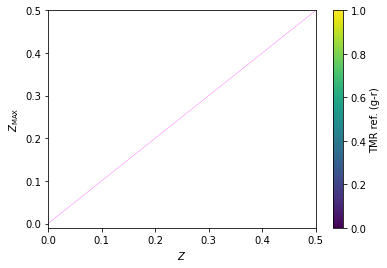

In [14]:
xs = np.arange(-0.1, 0.6, 0.01)

pl.scatter(problematic['Z'], problematic['ZMAX'], marker='.', lw=0.0, c=problematic['REF_GMR0P0'], s=3)
pl.plot(xs, xs, c='magenta', lw=0.25)

pl.xlabel(r'$Z$')
pl.ylabel(r'$Z_{\rm MAX}$')

pl.xlim(0.0,  0.5)
pl.ylim(-0.01, 0.5)

pl.colorbar(label='TMR ref. (g-r)')

# Done.